In [90]:
import pandas as pd

In [91]:
df = pd.read_csv('../data/raw/clientes_banco.csv')

In [92]:
type(df)

pandas.core.frame.DataFrame

Dados carregados, e listando abaixo as 10 primeiras linhas

In [93]:
df.head(10)

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
3,5008808,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
4,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
5,5008810,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
6,5008811,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
7,5008812,61,Ensino superior,Divorciado,1,Pensionista,Outro,0,283500.0,0,Casa/apartamento próprio
8,5008813,61,Ensino superior,Divorciado,1,Pensionista,Outro,0,283500.0,0,Casa/apartamento próprio
9,5008814,61,Ensino superior,Divorciado,1,Pensionista,Outro,0,283500.0,0,Casa/apartamento próprio


Verificando se existem dados nulos

In [94]:
df.isnull().sum()

ID_Cliente            0
Idade                 0
Grau_escolaridade     0
Estado_civil          0
Tamanho_familia       0
Categoria_de_renda    0
Ocupacao              0
Anos_empregado        0
Rendimento_anual      0
Tem_carro             0
Moradia               0
dtype: int64

In [95]:
df.shape

(438463, 11)

Análise geral inicial (Obs.: A maioria dos resultados abaixo, não teram muita utilidade)

In [96]:
df.describe()

,ID_Cliente,Idade,Tamanho_familia,Anos_empregado,Rendimento_anual,Tem_carro
count,4.384630e+05,438463.000000,438463.000000,438463.000000,4.384630e+05,438463.000000
mean,6.021894e+06,43.295865,2.194461,5.531215,1.875220e+05,0.371906
std,5.713554e+05,11.459616,0.897194,6.492446,1.100832e+05,0.483314
min,5.008804e+06,20.000000,1.000000,0.000000,2.610000e+04,0.000000
25%,5.609340e+06,34.000000,2.000000,1.000000,1.215000e+05,0.000000
50%,6.047690e+06,42.000000,2.000000,4.000000,1.611000e+05,0.000000
75%,6.454118e+06,53.000000,3.000000,8.000000,2.250000e+05,1.000000
max,7.999952e+06,68.000000,20.000000,47.000000,6.750000e+06,1.000000


Análise Inicial do Rendimento Anual

In [97]:
df['Rendimento_anual'].mean()

np.float64(187522.00938156698)

In [98]:
df['Categoria_de_renda'].describe()

count        438463
unique            5
top       Empregado
freq         226059
Name: Categoria_de_renda, dtype: object

In [99]:

df.groupby('Categoria_de_renda')[['Rendimento_anual']].aggregate(['min', 'max', 'mean'])

Rendimento_anual                          
                                 min        max           mean
Categoria_de_renda                                            
Associado comercial          28723.5  3950059.5  222213.840058
Empregado                    27000.0  6750000.0  181258.061792
Estudante                   112500.0   225000.0  159617.647059
Pensionista                  26100.0  1260000.0  153572.807109
Servidor público             27000.0  3150000.0  200913.509659

Distribuição por faixa etária

In [100]:
import sys 
sys.path.append('../data/utils')

from faixas import categorizar_faixa_etaria

df['Faixa_etaria'] = df['Idade'].apply(categorizar_faixa_etaria)

In [101]:
df['Faixa_etaria'].describe()

count     438463
unique         4
top        35-50
freq      177666
Name: Faixa_etaria, dtype: object

In [102]:
df.Faixa_etaria.unique()

array(['25-35', '50 >', '35-50', '< 25'], dtype=object)

In [103]:
df.groupby('Faixa_etaria')[['Idade']].mean()

,Idade
Faixa_etaria,
25-35,29.980067
35-50,41.597407
50 >,57.027889
< 25,23.140017


In [104]:
df.groupby('Faixa_etaria')[['Estado_civil']].describe()

Estado_civil                         
                    count unique       top    freq
Faixa_etaria                                      
25-35              108265      5    Casado   75294
35-50              177666      5    Casado  127733
50 >               142169      5    Casado   92926
< 25                10363      5  Solteiro    5017

Vizualizando a distribuição por faixa etária

<Axes: xlabel='Faixa Etária', ylabel='Quantidade'>

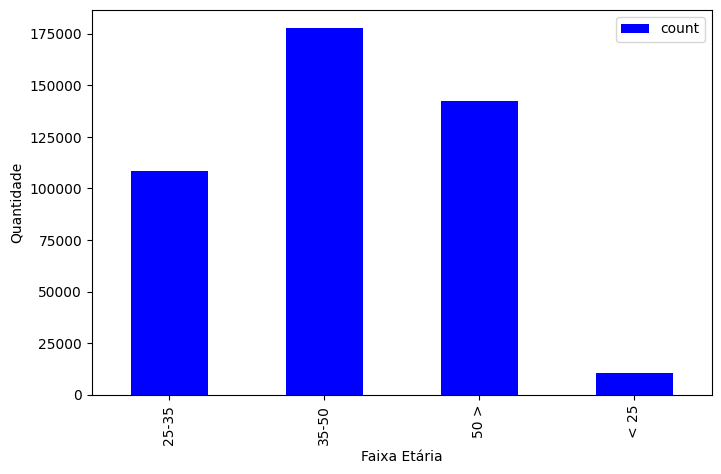

In [105]:
faixa_etaria = df.Faixa_etaria.value_counts().to_frame().sort_values('Faixa_etaria')
faixa_etaria.plot(kind='bar', figsize=(8,5), color='blue', xlabel='Faixa Etária', ylabel='Quantidade')


In [106]:
df.head()

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado,25-35
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado,25-35
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio,50 >
3,5008808,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio,50 >
4,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio,50 >


Listando clientes com maior potencial de inverstimento

In [107]:
from investimento import potencial_investimento

df['Potencial_investimento'] = df['Rendimento_anual'].apply(potencial_investimento)

In [108]:
alto_potencial = df.query('Potencial_investimento == "Alto"')

In [109]:
alto_potencial.head()

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria,Potencial_investimento
267,5009092,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto
268,5009094,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto
269,5009095,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto
270,6153741,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto
492,5009359,52,Ensino superior,Solteiro,1,Empregado,Gerência,20,900000.0,1,Casa/apartamento próprio,50 >,Alto


In [110]:
maiores_clientes = alto_potencial.sort_values(by='Rendimento_anual', ascending=False).head(10)
maiores_clientes

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria,Potencial_investimento
421261,7987964,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228162,5987967,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228163,5987968,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228164,5987969,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228160,5987964,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228161,5987966,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
228159,5987963,52,Ensino superior,Casado,2,Empregado,Construção Civil,1,6750000.0,1,Casa/apartamento próprio,50 >,Alto
282690,6123710,51,Ensino superior,Casado,2,Empregado,Gerência,9,4500000.0,1,Casa/apartamento próprio,50 >,Alto
282687,6123707,51,Ensino superior,Casado,2,Empregado,Gerência,9,4500000.0,1,Casa/apartamento próprio,50 >,Alto
282694,6272042,51,Ensino superior,Casado,2,Empregado,Gerência,9,4500000.0,1,Casa/apartamento próprio,50 >,Alto


Criando nova coluna 'Rendimento Mensal'

In [111]:
df['Rendimento_mensal'] = df['Rendimento_anual'] / 12

Distribuição salário por profissão

In [112]:
salario_medio_ocupacao = df.groupby('Ocupacao')['Rendimento_mensal'].mean().sort_values(ascending=False)
salario_medio_ocupacao

Ocupacao
Gerência                23508.316860
Corretor imobiliário    18625.900576
Contabilidade           17927.497082
TI                      17579.894454
RH                      16968.390504
Motorista               16838.475704
Serviço privado         16802.203329
Alta tecnologia         16309.354849
Equipe principal        15909.744317
Construção Civil        14989.242047
Vendas                  14242.318214
Outro                   14238.980486
Segurança               14152.926138
Secretariado            14121.406556
Medicina                14009.312972
Garçom                  13233.051802
Cozinha                 12988.263593
Baixa qualificação      12527.859112
Limpeza                 12253.469836
Name: Rendimento_mensal, dtype: float64

<Axes: xlabel='Ocupação', ylabel='Salário Mensal Médio'>

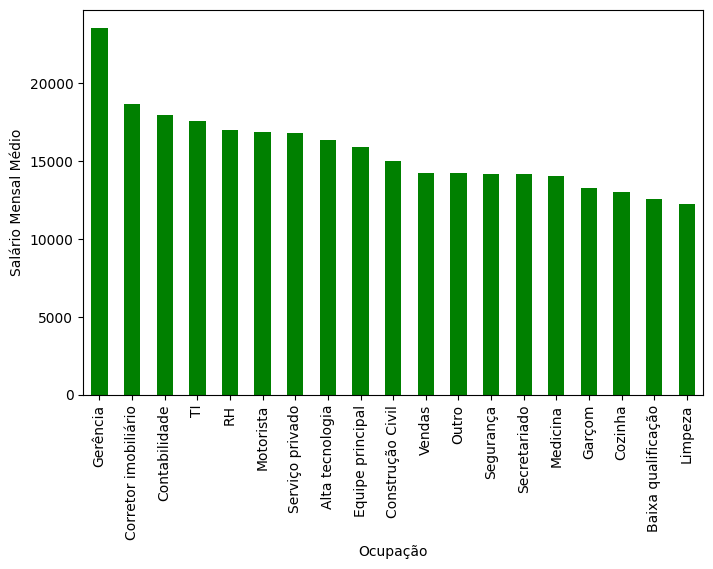

In [113]:
salario_medio_ocupacao.plot(kind='bar', figsize=(8,5), color='green', xlabel='Ocupação', ylabel='Salário Mensal Médio')

Distribuição dos clientes por escolaridade

In [114]:
df.Grau_escolaridade.describe()

count           438463
unique               5
top       Ensino médio
freq            301756
Name: Grau_escolaridade, dtype: object

In [115]:
df.Grau_escolaridade.unique()

array(['Ensino superior', 'Ensino médio', 'Ensino superior incompleto',
       'Ensino fundamental', 'Pós-graduação'], dtype=object)

In [116]:
df.Grau_escolaridade.value_counts().to_frame()

,count
Grau_escolaridade,
Ensino médio,301756
Ensino superior,117499
Ensino superior incompleto,14845
Ensino fundamental,4051
Pós-graduação,312


Relação Salário/Escolaridade

In [117]:
df.groupby('Grau_escolaridade')['Rendimento_mensal'].mean().sort_values(ascending=False)

Grau_escolaridade
Pós-graduação                 20057.692308
Ensino superior               18841.488275
Ensino superior incompleto    17277.191832
Ensino médio                  14338.090872
Ensino fundamental            11994.488768
Name: Rendimento_mensal, dtype: float64

Por amostra: 'Ensino fundamental'

In [118]:
df_ensino_fundamental = df.query('Grau_escolaridade == "Ensino fundamental"')

In [119]:
df_ensino_fundamental.Rendimento_mensal.describe()

count     4051.000000
mean     11994.488768
std       5480.746288
min       2325.000000
25%       7500.000000
50%      11250.000000
75%      15000.000000
max      45000.000000
Name: Rendimento_mensal, dtype: float64

Apenas 6 clientes possuem Potencial de investimento Alto, com Grau de escolaridade Ensino fundamental

In [120]:
df_ensino_fundamental.query('Potencial_investimento == "Alto"')

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria,Potencial_investimento,Rendimento_mensal
63232,5208406,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0
63233,5208407,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0
63234,5208408,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0
63235,5208410,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0
63236,5208411,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0
63237,5208412,37,Ensino fundamental,Casado,4,Associado comercial,Gerência,2,540000.0,1,Casa/apartamento próprio,35-50,Alto,45000.0


Mais de 80% possui Potencial Baixo. Esperado, uma vez que existe (nesta amostra) correlação entre Salário e Grau de escolaridade

In [121]:
df_ensino_fundamental.Potencial_investimento.value_counts(normalize=True).to_frame().sort_values('proportion')

,proportion
Potencial_investimento,
Alto,0.001481
Médio,0.192051
Baixo,0.806468


Selecionando os clientes com Potencial Alto para o time de Produtos Bancários

In [122]:
potencial_alto = df.query('Potencial_investimento == "Alto"')

In [123]:
potencial_alto.to_csv('../data/processed/clientes_alto_potencial.csv', index=False)

Segmentações:

In [124]:
segmento_ocupacao = df.groupby(['Ocupacao', 'Estado_civil']).size().to_frame(name='Total_clientes')
segmento_ocupacao

Total_clientes
Ocupacao        Estado_civil                 
Alta tecnologia Casado                  12197
                Divorciado               1202
                Solteiro                 2350
                União-estável            1118
                Viúvo                     416
...                                       ...
Vendas          Casado                  26357
                Divorciado               2676
                Solteiro                 5918
                União-estável            5102
                Viúvo                    1039

[94 rows x 1 columns]

Grupo com maior média salarial

In [125]:
ocupacao_civil_media = (
  df.groupby(['Estado_civil'])['Rendimento_mensal']
  .mean()
  .round(2)
  .to_frame(name='Média Salário Mensal')
  .sort_values(by='Média Salário Mensal', ascending=False)
)

ocupacao_civil_media

,Média Salário Mensal
Estado_civil,
Divorciado,16465.34
União-estável,16081.50
Solteiro,15964.77
Casado,15524.69
Viúvo,14228.44


Análise de perfil

In [126]:
df.Rendimento_mensal.describe()

count    438463.000000
mean      15626.834115
std        9173.596147
min        2175.000000
25%       10125.000000
50%       13425.000000
75%       18750.000000
max      562500.000000
Name: Rendimento_mensal, dtype: float64

In [127]:
potencial_alto.Rendimento_mensal.describe()

count      5396.000000
mean      59568.560485
std       33350.390610
min       42000.000000
25%       45000.000000
50%       52500.000000
75%       60000.000000
max      562500.000000
Name: Rendimento_mensal, dtype: float64

Criada coluna Perfil de Investidor, para os clientes de Alto potencial & \
Criada função (ficticia) que classifica perfil do investidor de acordo com sua renda mensal

In [137]:
from perfil import perfil_investidor

df_alto_potencial = pd.read_csv('../data/processed/clientes_alto_potencial.csv')

df_alto_potencial['Perfil_investidor'] = df_alto_potencial['Rendimento_mensal'].apply(perfil_investidor)

In [140]:
df_alto_potencial.query('Perfil_investidor == "Arrojado"')

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria,Potencial_investimento,Rendimento_mensal,Perfil_investidor
0,5009092,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto,63750.0,Arrojado
1,5009094,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto,63750.0,Arrojado
2,5009095,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto,63750.0,Arrojado
3,6153741,33,Ensino superior,Casado,3,Empregado,Gerência,3,765000.0,1,Casa/apartamento próprio,25-35,Alto,63750.0,Arrojado
4,5009359,52,Ensino superior,Solteiro,1,Empregado,Gerência,20,900000.0,1,Casa/apartamento próprio,50 >,Alto,75000.0,Arrojado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,6604472,31,Ensino médio,Casado,2,Empregado,Construção Civil,4,675000.0,1,Casa/apartamento próprio,25-35,Alto,56250.0,Arrojado
5390,6604473,31,Ensino médio,Casado,2,Empregado,Construção Civil,4,675000.0,1,Casa/apartamento próprio,25-35,Alto,56250.0,Arrojado
5391,6630576,41,Ensino superior,União-estável,3,Pensionista,Gerência,2,675000.0,1,Casa/apartamento próprio,35-50,Alto,56250.0,Arrojado
5392,6697842,42,Ensino médio,Solteiro,1,Associado comercial,Gerência,4,675000.0,0,Casa/apartamento próprio,35-50,Alto,56250.0,Arrojado


Consultas específicas: Potencial/Idade

In [144]:
df_clientes_alto_faixa = df.query('Potencial_investimento == "Alto" & Faixa_etaria == "35-50"')
df_clientes_alto_faixa

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia,Faixa_etaria,Potencial_investimento,Rendimento_mensal
792,5009694,35,Ensino superior,Casado,2,Associado comercial,Gerência,4,1350000.0,1,Habitação pública,35-50,Alto,112500.0
793,5009695,35,Ensino superior,Casado,2,Associado comercial,Gerência,4,1350000.0,1,Habitação pública,35-50,Alto,112500.0
794,5009698,35,Ensino superior,Casado,2,Associado comercial,Gerência,4,1350000.0,1,Habitação pública,35-50,Alto,112500.0
795,5009699,35,Ensino superior,Casado,2,Associado comercial,Gerência,4,1350000.0,1,Habitação pública,35-50,Alto,112500.0
796,5009700,35,Ensino superior,Casado,2,Associado comercial,Gerência,4,1350000.0,1,Habitação pública,35-50,Alto,112500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438001,6630576,41,Ensino superior,União-estável,3,Pensionista,Gerência,2,675000.0,1,Casa/apartamento próprio,35-50,Alto,56250.0
438161,6697842,42,Ensino médio,Solteiro,1,Associado comercial,Gerência,4,675000.0,0,Casa/apartamento próprio,35-50,Alto,56250.0
438200,6715605,39,Ensino superior,Casado,5,Associado comercial,Gerência,8,585000.0,1,Casa/apartamento próprio,35-50,Alto,48750.0
438201,6715606,39,Ensino superior,Casado,5,Associado comercial,Gerência,8,585000.0,1,Casa/apartamento próprio,35-50,Alto,48750.0


In [145]:
df_clientes_alto_faixa.to_csv('../data/processed/cliente_alto_potencial_35_50.csv', index=False)

Vizualições

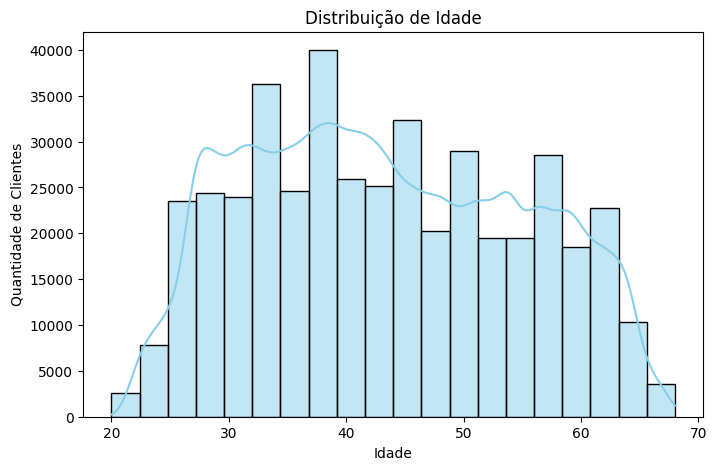

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
Gráfico, mostrando a distribuição de Idade entre os clientes.
Permite visualizar quais faixas de idade são mais comuns na base de dados.
'''

plt.figure(figsize=(8,5))
sns.histplot(df['Idade'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Clientes')
plt.show()

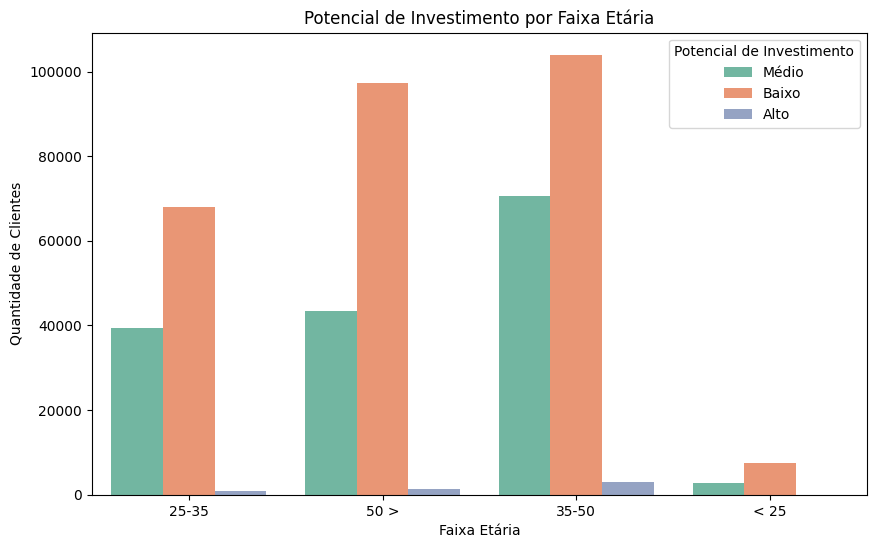

In [156]:
'''
Gráfico, demonstrando o potencial de investimento por faixa etária.
Útil para identificar faixas etárias com maior concentração de clientes e seu potencial.
'''

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Faixa_etaria', hue='Potencial_investimento', palette='Set2')
plt.title('Potencial de Investimento por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Potencial de Investimento')
plt.show()

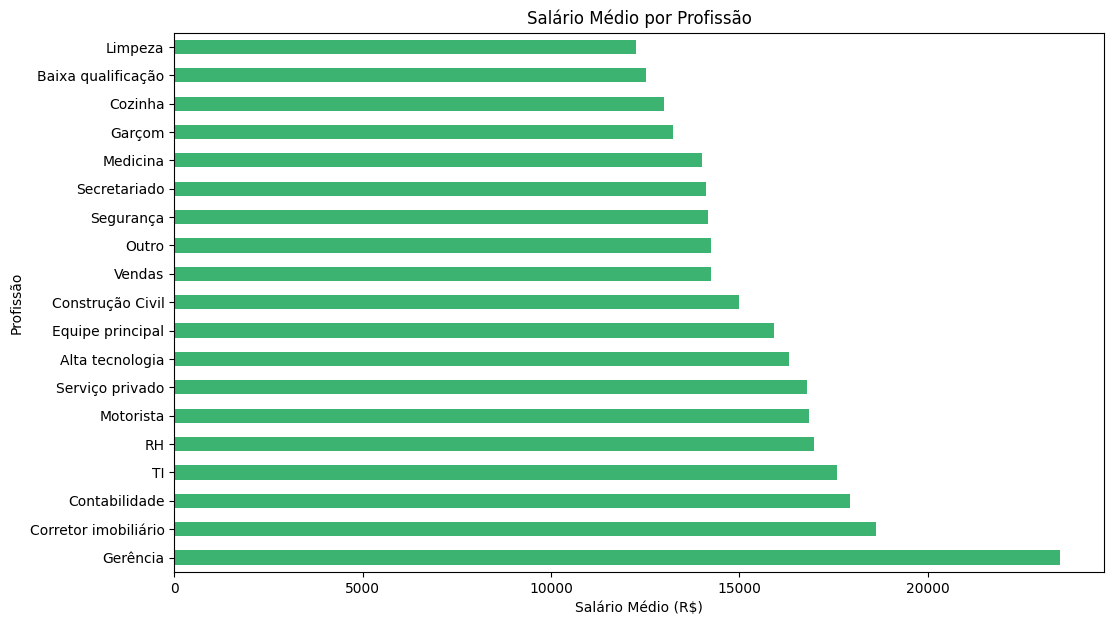

In [154]:
'''
Gráfico de barras horizontais que mostra a distribuição do salário médio por ocupação.
Utiliza os dados agrupados por 'Ocupacao' e calcula a média da variável 'Rendimento_mensal'.
A visualização permite identificar quais profissões têm maior ou menor média salarial.
'''

plt.figure(figsize=(12,7))
salario_medio_ocupacao.plot(kind='barh', color='mediumseagreen')
plt.title('Salário Médio por Profissão')
plt.xlabel('Salário Médio (R$)')
plt.ylabel('Profissão')
plt.show()


Gerando arquivo final

In [161]:
df.to_csv('../data/processed/clientes_banco_final.csv', index=False)

In [163]:
df.to_excel('../data/processed/clientes_banco_final.xlsx', index=False)